<a href="https://colab.research.google.com/github/Sirisha99922/YELLOW-TAXI-NYC/blob/main/Yellow_Taxi_Tip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
yellowtaxi=pd.read_csv("/content/drive/MyDrive/YELLOW  TAXI TIP/yellow_tripdata_2021-07.csv",low_memory=False)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
yellowtaxi.shape

(2821515, 18)

In [ ]:
yellowtaxi.info(null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2821515 entries, 0 to 2821514
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               2690859 non-null  float64
 1   tpep_pickup_datetime   2821515 non-null  object 
 2   tpep_dropoff_datetime  2821515 non-null  object 
 3   passenger_count        2690859 non-null  float64
 4   trip_distance          2821515 non-null  float64
 5   RatecodeID             2690859 non-null  float64
 6   store_and_fwd_flag     2690859 non-null  object 
 7   PULocationID           2821515 non-null  int64  
 8   DOLocationID           2821515 non-null  int64  
 9   payment_type           2690859 non-null  float64
 10  fare_amount            2821515 non-null  float64
 11  extra                  2821515 non-null  float64
 12  mta_tax                2821515 non-null  float64
 13  tip_amount             2821515 non-null  float64
 14  tolls_amount      

In [ ]:
yellowtaxi_dropna=yellowtaxi.dropna()

In [ ]:
yellowtaxi_dropna.info(null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2690859 entries, 0 to 2690858
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               2690859 non-null  float64
 1   tpep_pickup_datetime   2690859 non-null  object 
 2   tpep_dropoff_datetime  2690859 non-null  object 
 3   passenger_count        2690859 non-null  float64
 4   trip_distance          2690859 non-null  float64
 5   RatecodeID             2690859 non-null  float64
 6   store_and_fwd_flag     2690859 non-null  object 
 7   PULocationID           2690859 non-null  int64  
 8   DOLocationID           2690859 non-null  int64  
 9   payment_type           2690859 non-null  float64
 10  fare_amount            2690859 non-null  float64
 11  extra                  2690859 non-null  float64
 12  mta_tax                2690859 non-null  float64
 13  tip_amount             2690859 non-null  float64
 14  tolls_amount      

In [ ]:
# pd.to_datetime()
yellowtaxi_dropna.tpep_pickup_datetime=pd.to_datetime(yellowtaxi_dropna.tpep_pickup_datetime,errors='coerce')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
yellowtaxi_dropna.tpep_dropoff_datetime=pd.to_datetime(yellowtaxi_dropna.tpep_dropoff_datetime,errors='coerce')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
yellowtaxi_dropna['trip_time']=yellowtaxi_dropna.tpep_dropoff_datetime-yellowtaxi_dropna.tpep_pickup_datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
yellowtaxi_dropna.trip_time.describe()

count                      2690859
mean     0 days 00:16:18.381787005
std      0 days 01:03:39.514093587
min              -2 days +09:14:36
25%                0 days 00:06:33
50%                0 days 00:10:38
75%                0 days 00:16:56
max                2 days 02:18:37
Name: trip_time, dtype: object

In [ ]:
# Convert time into minutes
yellowtaxi_dropna.trip_time=yellowtaxi_dropna.trip_time.dt.total_seconds()/60.0

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
np.round(yellowtaxi_dropna.trip_time.describe(),2)

count    2690859.00
mean          16.31
std           63.66
min        -2325.40
25%            6.55
50%           10.63
75%           16.93
max         3018.62
Name: trip_time, dtype: float64

In [ ]:
# Extract information from date as new variables - pickuptime date
# Weekday, Weeknumber, Hour of day, day of month,ismonthstart, ismonthend
yellowtaxi_dropna['hourofday']=yellowtaxi_dropna.tpep_pickup_datetime.dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
yellowtaxi_dropna["weekday"]=yellowtaxi_dropna.tpep_pickup_datetime.dt.weekday

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
yellowtaxi_dropna["weeknumber"]=yellowtaxi_dropna.tpep_pickup_datetime.dt.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
yellowtaxi_dropna["dayofmonth"]=yellowtaxi_dropna.tpep_pickup_datetime.dt.day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
yellowtaxi_dropna["ismonthstart"]=yellowtaxi_dropna.tpep_pickup_datetime.dt.is_month_start

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
yellowtaxi_dropna["ismonthend"]=yellowtaxi_dropna.tpep_pickup_datetime.dt.is_month_end

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
yellowtaxi_dropna.info(null_counts=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2690859 entries, 0 to 2690858
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               2690859 non-null  float64       
 1   tpep_pickup_datetime   2690859 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  2690859 non-null  datetime64[ns]
 3   passenger_count        2690859 non-null  float64       
 4   trip_distance          2690859 non-null  float64       
 5   RatecodeID             2690859 non-null  float64       
 6   store_and_fwd_flag     2690859 non-null  object        
 7   PULocationID           2690859 non-null  int64         
 8   DOLocationID           2690859 non-null  int64         
 9   payment_type           2690859 non-null  float64       
 10  fare_amount            2690859 non-null  float64       
 11  extra                  2690859 non-null  float64       
 12  mta_tax                26908

In [ ]:
# tip_amount is the dependent variable
# What hour in the day maximum average tip_amount is paid?
hourlytip=np.round(yellowtaxi_dropna.tip_amount.groupby(yellowtaxi_dropna.hourofday).mean(),2).reset_index()

In [ ]:
import seaborn as sns

In [ ]:
!pip install matplotlib --upgrade

[Text(0, 0, '2.69'),
 Text(0, 0, '2.52'),
 Text(0, 0, '2.38'),
 Text(0, 0, '2.35'),
 Text(0, 0, '2.56'),
 Text(0, 0, '2.92'),
 Text(0, 0, '2.58'),
 Text(0, 0, '2.4'),
 Text(0, 0, '2.31'),
 Text(0, 0, '2.23'),
 Text(0, 0, '2.11'),
 Text(0, 0, '2.13'),
 Text(0, 0, '2.16'),
 Text(0, 0, '2.22'),
 Text(0, 0, '2.26'),
 Text(0, 0, '2.31'),
 Text(0, 0, '2.45'),
 Text(0, 0, '2.39'),
 Text(0, 0, '2.36'),
 Text(0, 0, '2.35'),
 Text(0, 0, '2.39'),
 Text(0, 0, '2.49'),
 Text(0, 0, '2.53'),
 Text(0, 0, '2.6')]

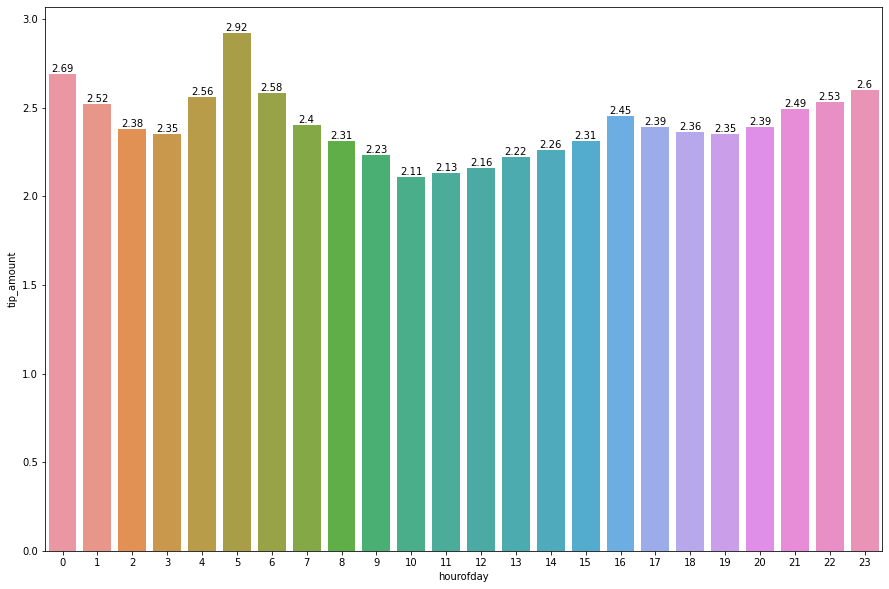

In [ ]:
plt.figure(figsize=(15,10))
hourax=sns.barplot(x='hourofday',y='tip_amount',data=hourlytip)
hourax.bar_label(hourax.containers[0])

In [ ]:
# Which weekday most average tip amount is paid?
weekdaytip=np.round(yellowtaxi_dropna.tip_amount.groupby(yellowtaxi_dropna.weekday).mean(),2).reset_index()

[Text(0, 0, '2.37'),
 Text(0, 0, '2.28'),
 Text(0, 0, '2.33'),
 Text(0, 0, '2.39'),
 Text(0, 0, '2.36'),
 Text(0, 0, '2.29'),
 Text(0, 0, '2.45')]

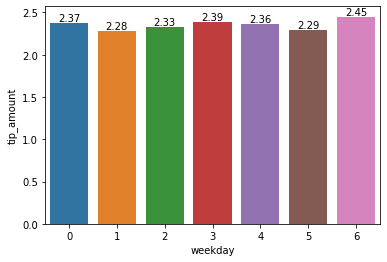

In [ ]:
weekax=sns.barplot(x='weekday',y='tip_amount',data=weekdaytip)
weekax.bar_label(weekax.containers[0])

In [ ]:
# Is there a relationship b/w tip_amount and trip_distance?
yellowtaxi_dropna[['tip_amount','trip_distance']].corr()
# No relationship b/w tip_amount and trip_distance

,tip_amount,trip_distance
tip_amount,1.000000,0.464515
trip_distance,0.464515,1.000000


In [ ]:
yellowtaxi_dropna.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'trip_time', 'hourofday',
       'weekday', 'weeknumber', 'dayofmonth', 'ismonthstart', 'ismonthend'],
      dtype='object')

In [ ]:
numericcols=yellowtaxi_dropna[['passenger_count', 'trip_distance','fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'trip_time',]]

In [ ]:
numericcols.corr()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time
passenger_count,1.000000,0.024004,0.023491,-0.118490,0.003134,0.007878,0.016201,0.004730,0.023385,0.006838,0.015869
trip_distance,0.024004,1.000000,0.790008,0.017983,-0.028540,0.464515,0.499659,0.023071,0.790738,-0.229972,0.133022
fare_amount,0.023491,0.790008,1.000000,0.011676,-0.018444,0.526044,0.532785,0.137138,0.976516,-0.234831,0.147048
extra,-0.118490,0.017983,0.011676,1.000000,0.091154,0.025618,0.018121,0.080687,0.038170,0.156455,-0.018851
mta_tax,0.003134,-0.028540,-0.018444,0.091154,1.000000,-0.019285,-0.090908,0.863824,0.003635,0.448299,0.002279
tip_amount,0.007878,0.464515,0.526044,0.025618,-0.019285,1.000000,0.368581,0.057826,0.666096,-0.046400,0.071457
tolls_amount,0.016201,0.499659,0.532785,0.018121,-0.090908,0.368581,1.000000,0.021002,0.625473,-0.122604,0.077032
improvement_surcharge,0.004730,0.023071,0.137138,0.080687,0.863824,0.057826,0.021002,1.000000,0.155784,0.410794,0.007742
total_amount,0.023385,0.790738,0.976516,0.038170,0.003635,0.666096,0.625473,0.155784,1.000000,-0.168094,0.142756
congestion_surcharge,0.006838,-0.229972,-0.234831,0.156455,0.448299,-0.046400,-0.122604,0.410794,-0.168094,1.000000,-0.029739


<AxesSubplot:>

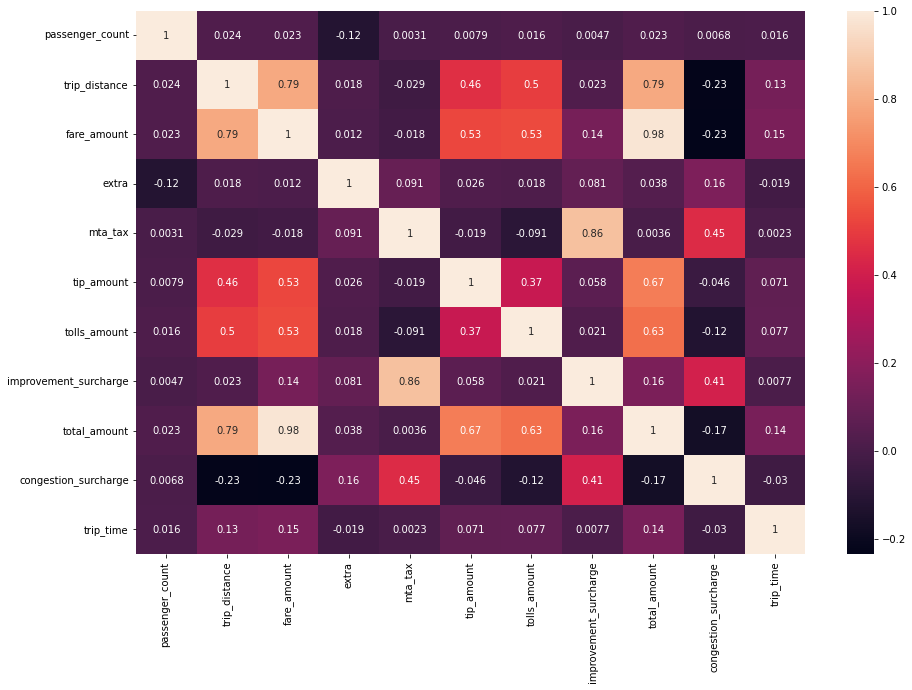

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(numericcols.corr(),annot=True)
# There is a multi collinearity between total amount and fare amount.

In [ ]:
# Test Null Avg tip_amount for ismonthstart True/False is equal
yellowtaxi_dropna.tip_amount.groupby(yellowtaxi_dropna.ismonthstart).var()

ismonthstart
False    8.301922
True     7.782274
Name: tip_amount, dtype: float64

In [ ]:
monthstart=yellowtaxi_dropna[yellowtaxi_dropna.ismonthstart==True]
notmonthstart=yellowtaxi_dropna[yellowtaxi_dropna.ismonthstart==False]

In [ ]:
print(monthstart.shape)
print(notmonthstart.shape)

(89751, 25)
(2601108, 25)


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(monthstart.tip_amount,notmonthstart.tip_amount,equal_var=False)

Ttest_indResult(statistic=1.47021802822982, pvalue=0.14150597470987603)

In [ ]:
yellowtaxi_dropna.total_amount.groupby(yellowtaxi_dropna.ismonthstart).mean()

ismonthstart
False    19.268514
True     19.296652
Name: total_amount, dtype: float64

In [ ]:
yellowtaxi_dropna.total_amount.groupby(yellowtaxi_dropna.ismonthstart).var()

ismonthstart
False    234.502360
True     227.803276
Name: total_amount, dtype: float64

In [ ]:
ttest_ind(monthstart.total_amount,notmonthstart.total_amount,equal_var=False)

Ttest_indResult(statistic=0.5488530558451898, pvalue=0.5831075698291752)

In [ ]:
yellowtaxi_dropna.passenger_count.value_counts()

1.0    1926214
2.0     415040
3.0     116369
5.0      71753
0.0      66750
4.0      50645
6.0      44072
7.0          6
9.0          6
8.0          4
Name: passenger_count, dtype: int64

In [ ]:
numericcols.head(3)

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time
0,1.0,0.8,5.0,3.0,0.5,0.0,0.0,0.3,8.8,2.5,4.233333
1,1.0,0.9,5.0,3.0,0.5,0.0,0.0,0.3,8.8,2.5,3.316667
2,1.0,2.8,10.0,3.0,0.5,0.0,0.0,0.3,13.8,2.5,6.416667


In [ ]:
np.round(numericcols.describe(),2)

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time
count,2690859.00,2690859.00,2690859.00,2690859.00,2690859.00,2690859.00,2690859.00,2690859.00,2690859.00,2690859.00,2690859.00
mean,1.46,3.20,13.06,1.05,0.49,2.35,0.38,0.30,19.27,2.28,16.31
std,1.07,4.54,12.41,1.24,0.08,2.88,1.85,0.04,15.31,0.74,63.66
min,0.00,0.00,-550.00,-4.50,-0.50,-91.66,-33.75,-0.30,-554.05,-2.50,-2325.40
25%,1.00,1.10,6.50,0.00,0.50,0.00,0.00,0.30,11.63,2.50,6.55
50%,1.00,1.82,9.50,0.50,0.50,2.00,0.00,0.30,14.76,2.50,10.63
75%,2.00,3.29,14.50,2.50,0.50,3.00,0.00,0.30,20.47,2.50,16.93
max,9.00,875.70,1320.00,36.10,4.55,400.00,956.55,0.30,1320.80,2.50,3018.62


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
numeric_scaled=scaler.fit_transform(numericcols)

In [ ]:
numeric_scaled=pd.DataFrame(numeric_scaled,columns=numericcols.columns)

<AxesSubplot:>

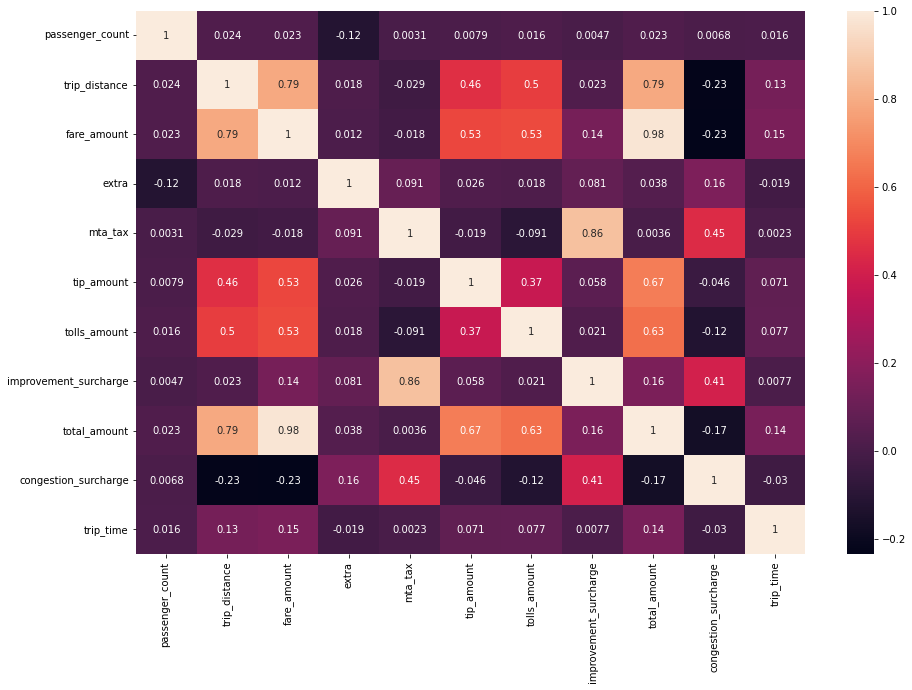

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(numeric_scaled.corr(),annot=True)

In [ ]:
yellowtaxi_dropna.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'trip_time', 'hourofday',
       'weekday', 'weeknumber', 'dayofmonth', 'ismonthstart', 'ismonthend'],
      dtype='object')

In [ ]:
categoriccols=yellowtaxi_dropna[['payment_type','hourofday',
       'weekday', 'weeknumber', 'dayofmonth', 'ismonthstart', 'ismonthend','VendorID','RatecodeID','store_and_fwd_flag']]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
categoriccolsdummy=categoriccols.apply(le.fit_transform)

In [ ]:
yellowtaxi_df=pd.concat([numericcols,categoriccolsdummy],axis=1)

In [ ]:
y=yellowtaxi_df.tip_amount
X=yellowtaxi_df.drop(['tip_amount','fare_amount'],axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X, y)

In [ ]:
reg.score(X, y)

0.5998106296381153

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree=DecisionTreeRegressor(max_depth=12)

In [ ]:
treemodel=tree.fit(X,y)

In [ ]:
treemodel.score(X,y)

0.9034986118553892

In [ ]:
pd.DataFrame(X.columns,treemodel.feature_importances_).reset_index().sort_values(ascending=False,by='index')

,index,0
6,5.345633e-01,total_amount
9,2.811045e-01,payment_type
1,7.049044e-02,trip_distance
17,4.230245e-02,RatecodeID
8,4.111275e-02,trip_time
4,1.396894e-02,tolls_amount
7,5.567569e-03,congestion_surcharge
2,5.167924e-03,extra
11,1.462752e-03,weekday
0,1.194247e-03,passenger_count
